In this example we learn about the relative drift importances that results in model drift. Here we use the model explainiabilty aspect of ML, available in CinnaMon library and its ModelDriftExplainer functionality.

The experiment is done with a random split so we should not detect a data drift. We had run our experiments on Iris Dataset.

#ModelDrift Explainer on CatBoost Classifier ML Model

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

from cinnamon.drift import ModelDriftExplainer

# Iris Data

In [2]:
dataset = datasets.load_iris()

In [3]:
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = dataset.target

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# iris is a multiclass classification problem
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

# Build CatBoost model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [7]:
clf = CatBoostClassifier(loss_function='MultiClass', 
                         learning_rate=0.1,
                         iterations=1000,
                         max_depth=6,
                         early_stopping_rounds=20,
                         random_seed=2021,
                         verbose=10,
                        )

In [8]:
clf.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=10)

0:	learn: 0.9908919	test: 1.0010868	best: 1.0010868 (0)	total: 51.7ms	remaining: 51.6s
10:	learn: 0.4406749	test: 0.4673091	best: 0.4673091 (10)	total: 56.9ms	remaining: 5.11s
20:	learn: 0.2615142	test: 0.2967043	best: 0.2967043 (20)	total: 60.8ms	remaining: 2.83s
30:	learn: 0.1796013	test: 0.2149838	best: 0.2149838 (30)	total: 64.4ms	remaining: 2.01s
40:	learn: 0.1421516	test: 0.1878814	best: 0.1878814 (40)	total: 67.7ms	remaining: 1.58s
50:	learn: 0.1123179	test: 0.1627549	best: 0.1627549 (50)	total: 71.3ms	remaining: 1.33s
60:	learn: 0.0894144	test: 0.1551505	best: 0.1551505 (60)	total: 74.7ms	remaining: 1.15s
70:	learn: 0.0745884	test: 0.1522542	best: 0.1517848 (69)	total: 78.6ms	remaining: 1.03s
80:	learn: 0.0630885	test: 0.1481738	best: 0.1471743 (79)	total: 82.4ms	remaining: 934ms
90:	learn: 0.0537004	test: 0.1517846	best: 0.1471686 (81)	total: 85.8ms	remaining: 857ms
100:	learn: 0.0468711	test: 0.1505366	best: 0.1471686 (81)	total: 89ms	remaining: 792ms
Stopped by overfitting d

In [9]:
drift_explainer = ModelDriftExplainer(clf)
drift_explainer.fit(X1=X_train, X2=X_test, y1=y_train, y2=y_test)

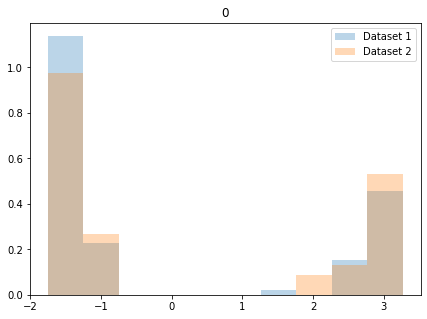

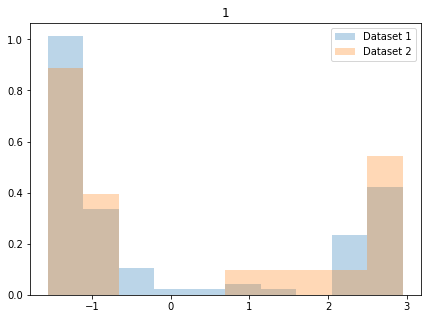

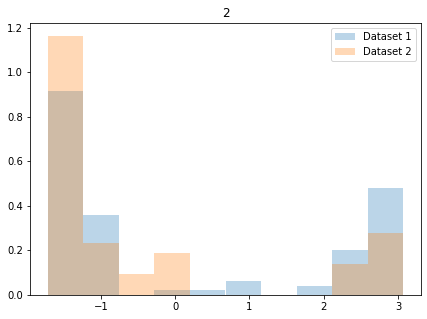

In [10]:
drift_explainer.plot_prediction_drift()

In [11]:
drift_explainer.get_prediction_drift()

[DriftMetricsNum(mean_difference=0.2556635888899628, wasserstein=0.2931763654790207, ks_test=BaseStatisticalTestResult(statistic=0.17142857142857143, pvalue=0.2821678346768165)),
 DriftMetricsNum(mean_difference=0.2536708490324236, wasserstein=0.2625697569861726, ks_test=BaseStatisticalTestResult(statistic=0.10793650793650794, pvalue=0.8205934119780007)),
 DriftMetricsNum(mean_difference=-0.5093344379223861, wasserstein=0.5240813705758235, ks_test=BaseStatisticalTestResult(statistic=0.18095238095238095, pvalue=0.22712915347334842))]

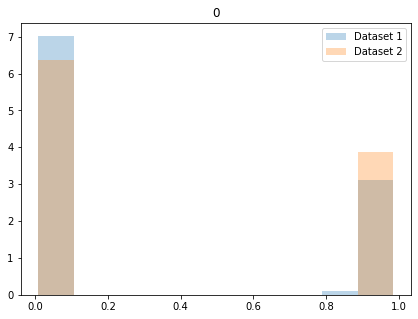

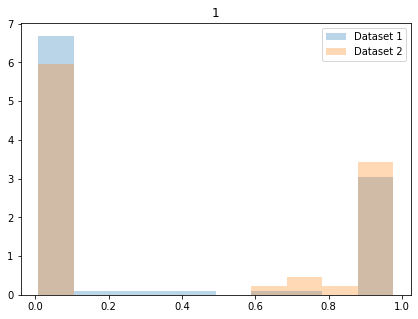

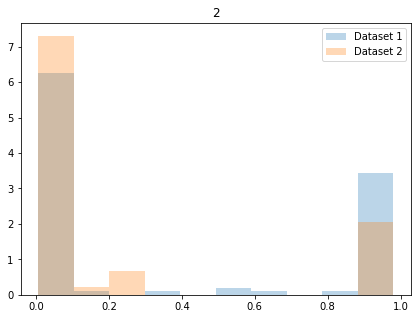

In [12]:
drift_explainer.plot_prediction_drift(prediction_type='proba')

In [13]:
drift_explainer.get_prediction_drift(prediction_type='proba')

[DriftMetricsNum(mean_difference=0.06068744478888638, wasserstein=0.062073873098040216, ks_test=BaseStatisticalTestResult(statistic=0.12063492063492064, pvalue=0.7069803362151522)),
 DriftMetricsNum(mean_difference=0.07308349137417464, wasserstein=0.07352443840551189, ks_test=BaseStatisticalTestResult(statistic=0.12698412698412698, pvalue=0.6467769104301898)),
 DriftMetricsNum(mean_difference=-0.13377093616306102, wasserstein=0.13459925728761946, ks_test=BaseStatisticalTestResult(statistic=0.18095238095238095, pvalue=0.22712915347334842))]

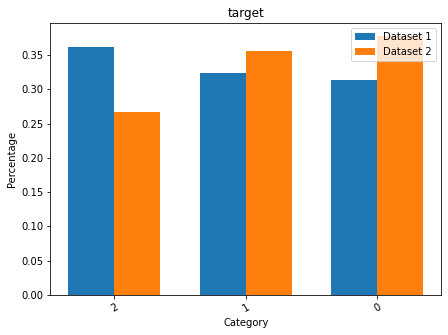

In [14]:
drift_explainer.plot_target_drift()

In [15]:
drift_explainer.get_target_drift()

DriftMetricsCat(wasserstein=0.09523809523809523, jensen_shannon=0.07382902143706498, chi2_test=Chi2TestResult(statistic=1.3333333333333333, pvalue=0.5134171190325922, dof=2, contingency_table=       0     1     2
X1  33.0  34.0  38.0
X2  17.0  16.0  12.0))

In [16]:
drift_explainer.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=0.9904761904761905, log_loss=0.06196156247077523), dataset2=ClassificationMetrics(accuracy=0.9333333333333333, log_loss=0.14716856908904924))

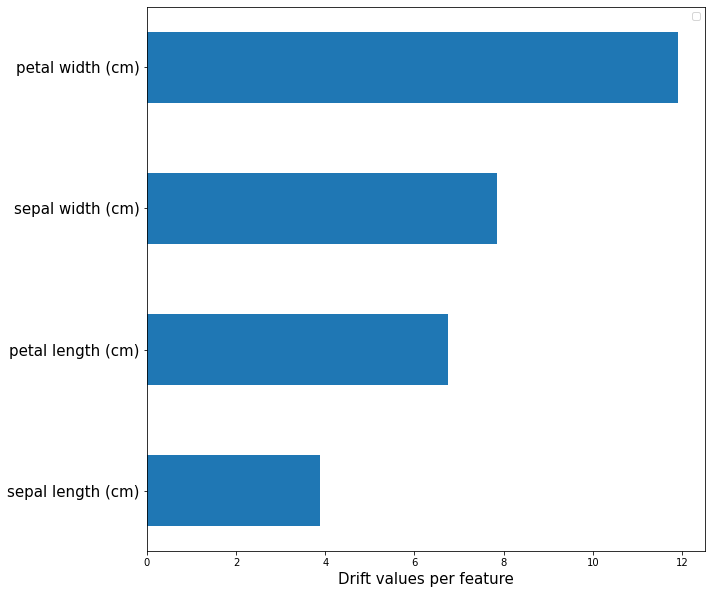

In [17]:
drift_explainer.plot_tree_based_drift_values()

In [18]:
drift_explainer.get_tree_based_drift_values()

array([[ 3.88114597],
       [ 7.84748116],
       [ 6.75366501],
       [11.90863769]])

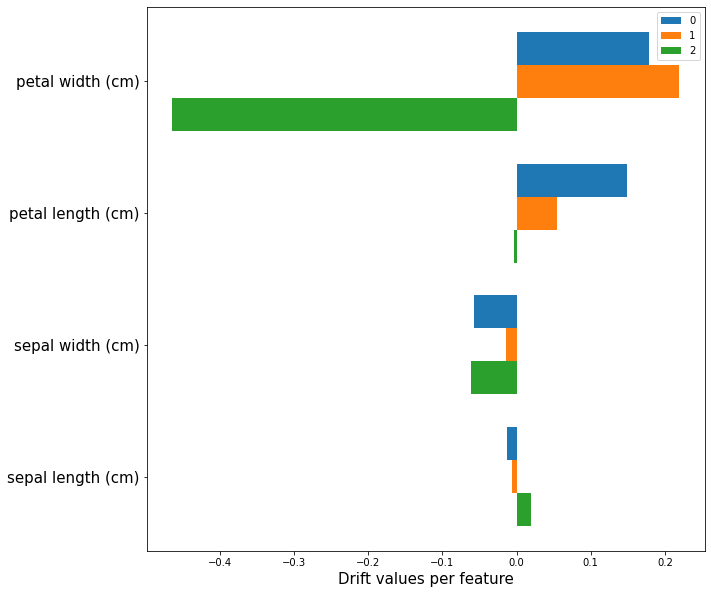

In [19]:
drift_explainer.plot_tree_based_drift_values(type='mean')

In [20]:
drift_explainer.get_tree_based_drift_values(type='mean')

array([[-0.01354953, -0.00602339,  0.01957293],
       [-0.05742398, -0.01429501, -0.06161435],
       [ 0.14828041,  0.05454545, -0.00282586],
       [ 0.17835669,  0.2194438 , -0.46446716]])

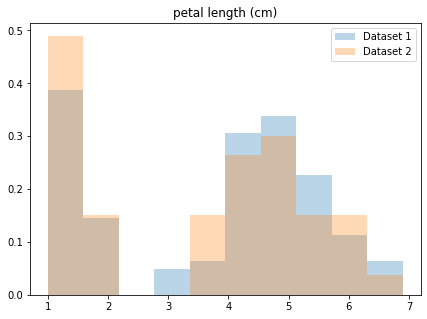

In [21]:
drift_explainer.plot_feature_drift(2)

In [22]:
drift_explainer.get_feature_drift(0)

DriftMetricsNum(mean_difference=-0.18571428571428505, wasserstein=0.19968253968253974, ks_test=BaseStatisticalTestResult(statistic=0.16507936507936508, pvalue=0.32376134275762936))